### Import Libraries and Load Data For country comparsion 

Importing important libraries and the data

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from scipy import stats
import os
from scipy.stats import zscore
from scipy.stats import f_oneway, kruskal

#

In [16]:
# Load dataset
benin = pd.read_csv("../data/benin_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo-dapaong_qc_clean.csv") 

In [17]:
# Add a country label to each 
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [8]:
# Combine them
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


### 1.Boxplots: GHI, DNI, DHI by Country

C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1142924164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


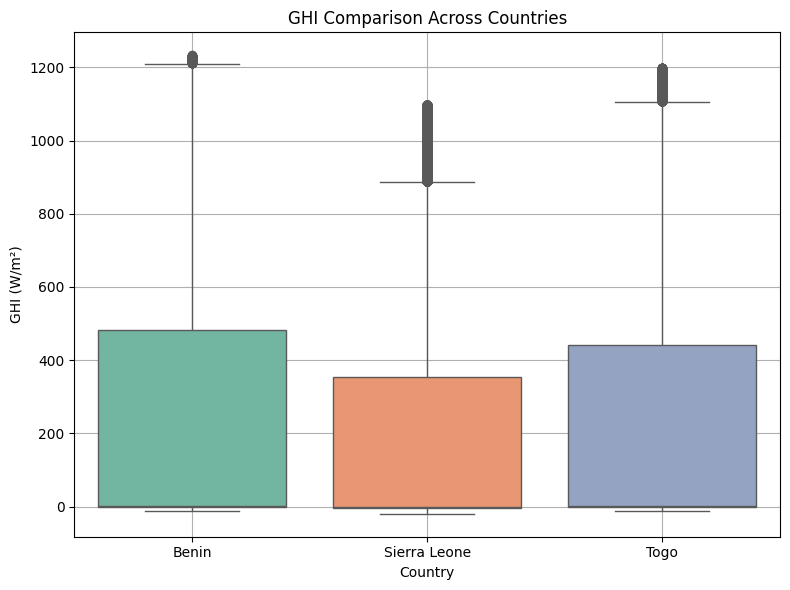

C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1142924164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


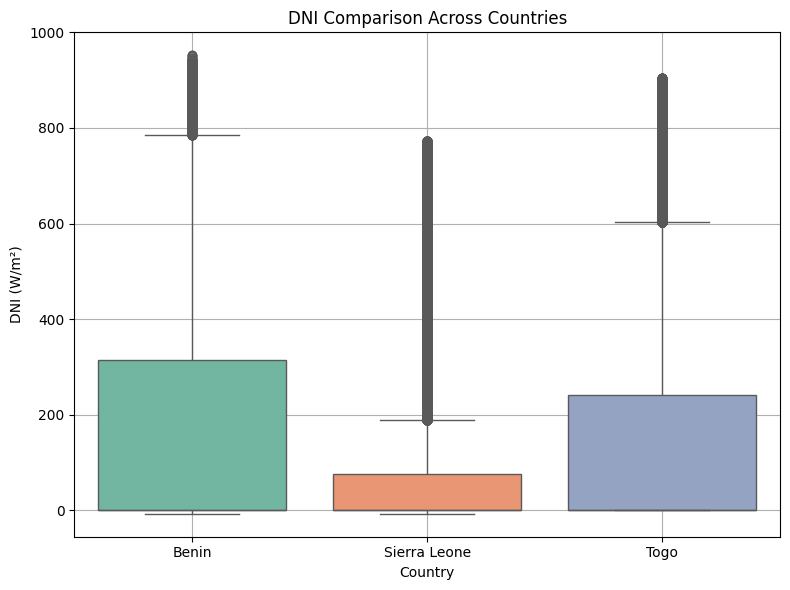

C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1142924164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


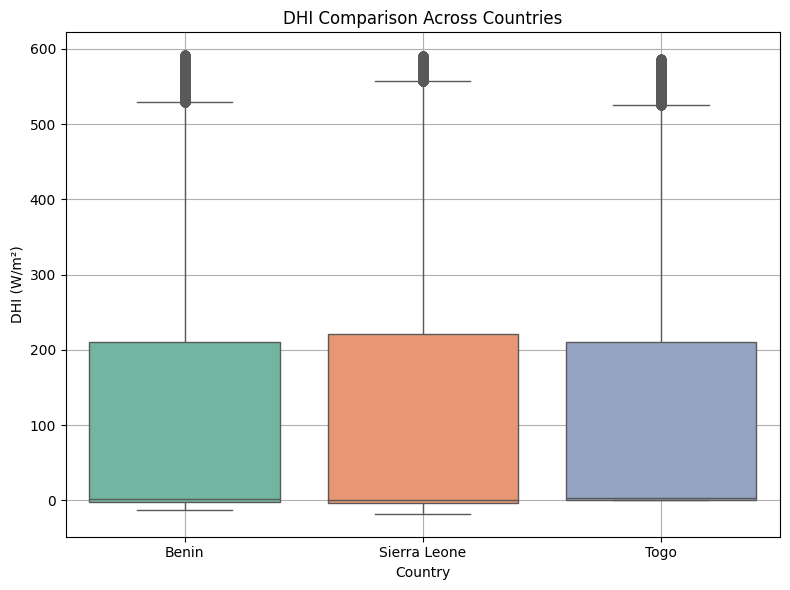

In [17]:
# Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country)
# Create a new column 'country' to identify the source of each row
metrics = ['GHI', 'DNI', 'DHI']

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1696683609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2', ax=ax)
C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1696683609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2', ax=ax)
C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\1696683609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2', ax=ax)


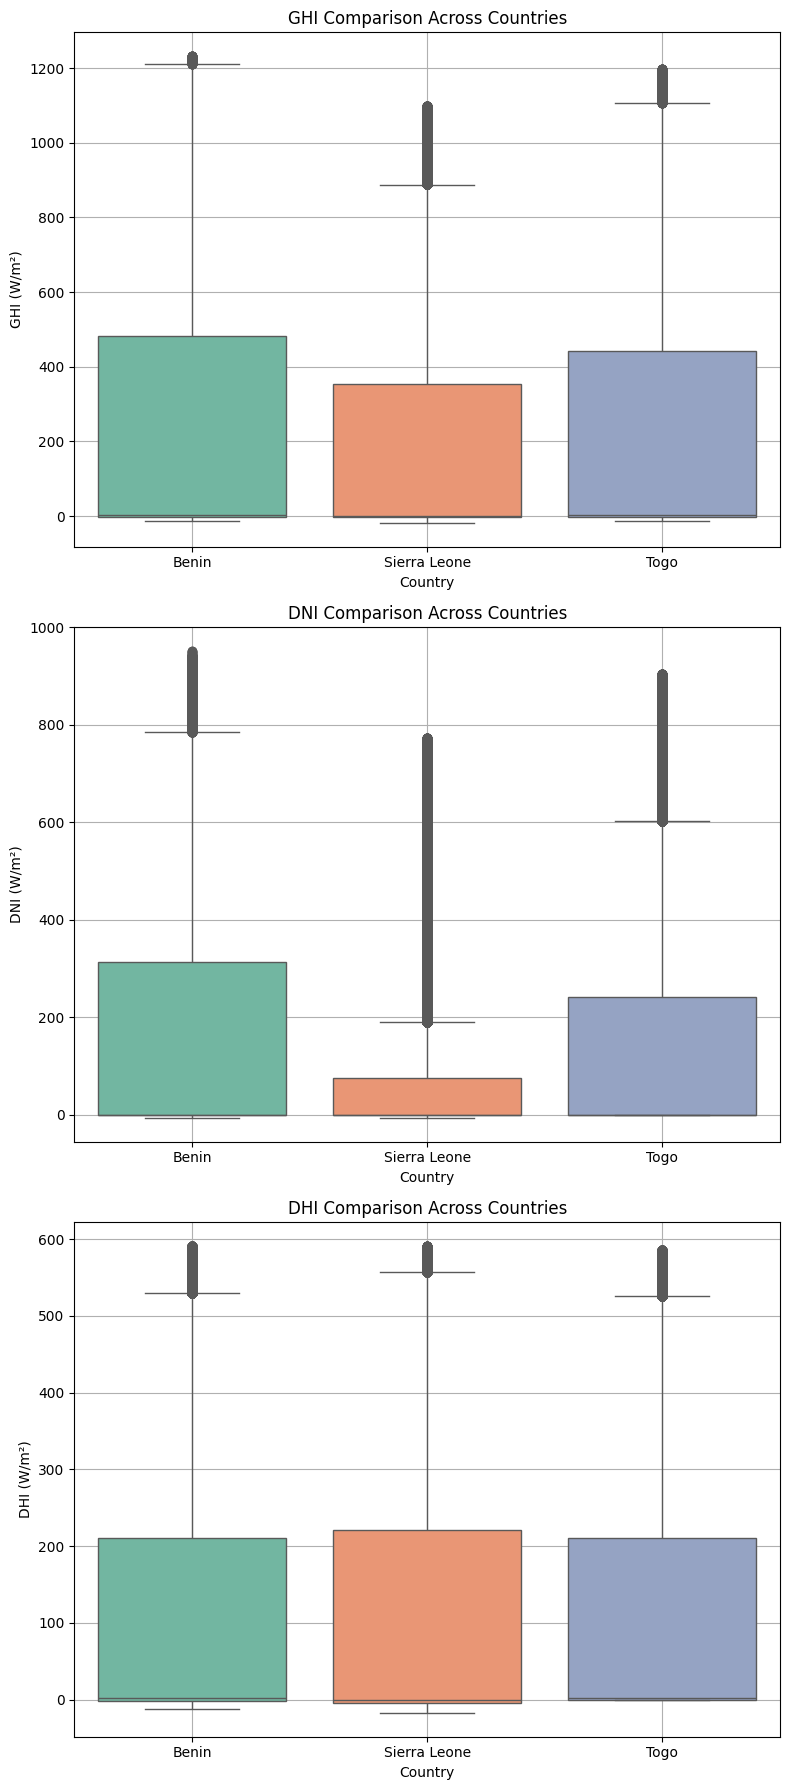

In [18]:
metrics = ['GHI', 'DNI', 'DHI']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))  # 3 rows, 1 col

for ax, metric in zip(axes, metrics):
    sns.boxplot(data=df, x='Country', y=metric, palette='Set2', ax=ax)
    ax.set_title(f'{metric} Comparison Across Countries')
    ax.set_ylabel(f'{metric} (W/m²)')
    ax.set_xlabel('Country')
    ax.grid(True)

plt.tight_layout()
plt.show()


### 2. Summary Table (Mean, Median, SD)

In [8]:
# Summary table: mean, median, std of GHI, DNI, DHI by country
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  110.91    1.6   
Sierra Leone  196.44    0.3  291.24  104.53   -0.1  201.70  110.11   -0.1   
Togo          229.83    2.1  321.64  149.37    0.0  248.55  112.41    2.5   

                      
                 std  
Country               
Benin         152.92  
Sierra Leone  154.17  
Togo          151.29

In [9]:
# Step 1: Your existing summary table
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Step 2: Convert MultiIndex columns to flat strings
summary.columns = ['_'.join(col) for col in summary.columns]

# Step 3: Convert to JSON
summary_json = summary.to_json(orient='index')

# Step 4 (Optional): Save to a JSON file
with open("summary_stats.json", "w") as f:
    f.write(summary_json)

# To print or return the JSON as a Python dict
import json
summary_dict = json.loads(summary_json)
print(summary_dict)

{'Benin': {'GHI_mean': 240.34, 'GHI_median': 1.8, 'GHI_std': 330.87, 'DNI_mean': 167.19, 'DNI_median': -0.1, 'DNI_std': 261.71, 'DHI_mean': 110.91, 'DHI_median': 1.6, 'DHI_std': 152.92}, 'Sierra Leone': {'GHI_mean': 196.44, 'GHI_median': 0.3, 'GHI_std': 291.24, 'DNI_mean': 104.53, 'DNI_median': -0.1, 'DNI_std': 201.7, 'DHI_mean': 110.11, 'DHI_median': -0.1, 'DHI_std': 154.17}, 'Togo': {'GHI_mean': 229.83, 'GHI_median': 2.1, 'GHI_std': 321.64, 'DNI_mean': 149.37, 'DNI_median': 0.0, 'DNI_std': 248.55, 'DHI_mean': 112.41, 'DHI_median': 2.5, 'DHI_std': 151.29}}


### 2.1 ANOVA (Analysis of Variance)

In [22]:
f_stat, p_value_anova = f_oneway(benin['GHI'], sierraleone['GHI'], togo['GHI'])
print(f"ANOvA f-stat:{f_stat:.4f}")
print(f"ANOVA p-value: {p_value_anova:.4f}")
# There is a statistically significant difference in average GHI between at least two of the countries.
# This means:
# It’s highly unlikely the differences are due to randomness.
#At least one country has a genuinely different solar potential.

ANOvA f-stat:2782.6224
ANOVA p-value: 0.0000


In [23]:
#ANOVA tells us that a difference exists, but not where.
#Use Tukey’s Honest Significant Difference (HSD) to find which countries differ from each other.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['GHI'], groups=df['Country'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
       Benin Sierra Leone -43.9008   0.0 -45.3411 -42.4605   True
       Benin         Togo -10.5109   0.0 -11.9512  -9.0706   True
Sierra Leone         Togo  33.3899   0.0  31.9496  34.8302   True
-----------------------------------------------------------------


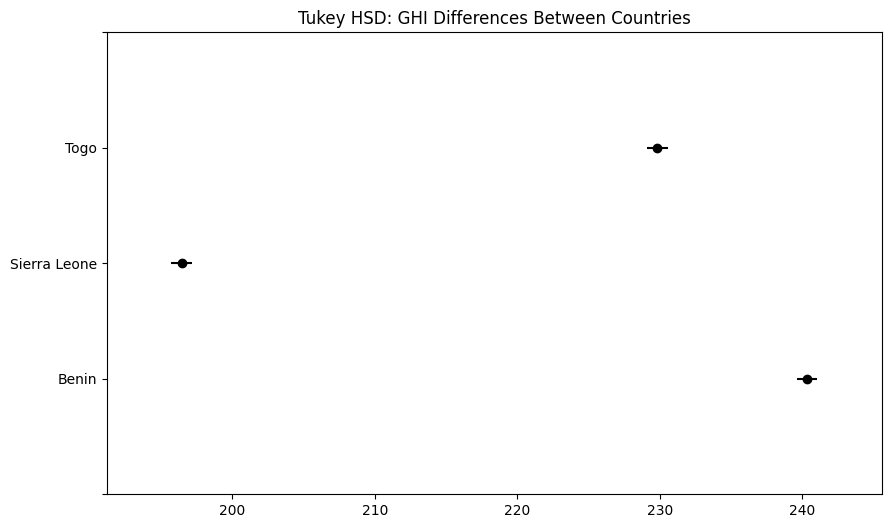

In [24]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey again for plotting
tukey_result = pairwise_tukeyhsd(endog=df['GHI'], groups=df['Country'], alpha=0.05)
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: GHI Differences Between Countries")
plt.show()


### Key Observations

- **Benin** shows the **highest average GHI (240.34 W/m²)** but also the **greatest variability** (`GHI_std = 330.87`), suggesting strong but inconsistent solar potential.
- **Togo** has the **highest median GHI (2.1)** and **highest median DHI (2.5)**, indicating **more consistent and reliable daylight conditions** — ideal for stable solar generation.
- **Sierra Leone** reports the **lowest mean and median GHI and DNI**, along with the **least variability**, which may indicate **limited solar intensity** but **predictable patterns**.

###  Investment Recommendation

Based on the analysis:

- **Togo** is the **most attractive for solar farm investment**, due to:
  - **High median solar irradiance**, indicating consistent daily sunlight
  - **Moderate variability**, which ensures system stability and predictable returns
- **Benin**, while having the highest average GHI, may require **additional storage** or **load balancing** infrastructure due to its higher day-to-day variability
- **Sierra Leone** appears **least suitable** for large-scale solar investment based on low intensity, unless targeting **low-power off-grid or microgrid solutions**


### 3. Visual Summary

C:\Users\ssss\AppData\Local\Temp\ipykernel_13116\2812227994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_df, x='GHI_mean', y='Country', palette='viridis')


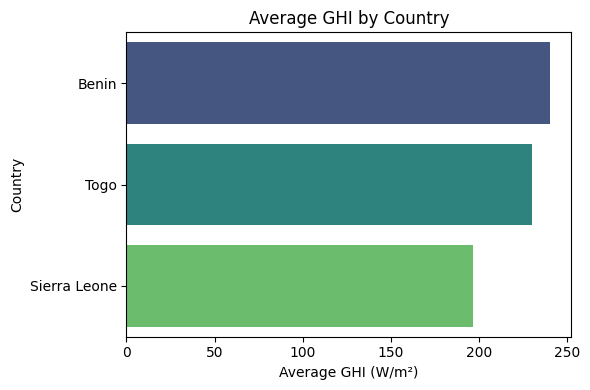

In [38]:
avg_ghi = {
    'Benin': 240.34,
    'Sierra Leone': 196.44,
    'Togo': 229.83
}

# Convert to DataFrame
ghi_df = pd.DataFrame(list(avg_ghi.items()), columns=['Country', 'GHI_mean'])
ghi_df = ghi_df.sort_values('GHI_mean', ascending=False)

# Plot ranked bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=ghi_df, x='GHI_mean', y='Country', palette='viridis')

plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [6]:
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,Hour,Month,Quarter
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,...,0.0,998,0,0.0,26.3,26.2,Benin,0,8,3
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,...,0.0,998,0,0.0,26.3,26.2,Benin,0,8,3
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,...,1.5,997,0,0.0,26.4,26.2,Benin,0,8,3
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,...,1.3,997,0,0.0,26.4,26.3,Benin,0,8,3
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,...,1.0,997,0,0.0,26.4,26.3,Benin,0,8,3


In [39]:
#  Data Export

df.to_csv("../data/combined_cleaned.csv", index=False)